
**Data Science and Business Analytics (GRIP September21)**

**Task 1 : Prediction using Supervised ML**

**Author : Rutuja Patil**

**Problem statement**

**What will be predicted score if a student studies for 9.25 hrs/ day?**

**Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print('Data successfully loaded')

Data successfully loaded


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Understanding the data**

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the data**

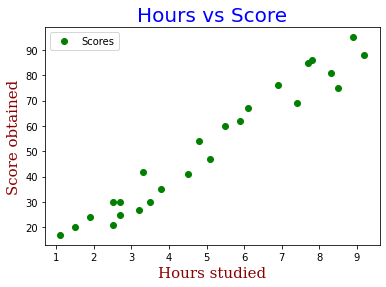

In [24]:
font1 = {'family':'Calibri','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
data.plot(x='Hours',y='Scores',style='o',c='green')
plt.title('Hours vs Score',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Score obtained',fontdict=font2)
plt.show()

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000




**From above plot, it is concluded that there is a liner relationship between the Hours and scores.**

**Cleaning the data**


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in data, data cleaning is done successfully. 

**Training and Testing the model**

In [10]:
x=(data['Hours'].values).reshape(-1,1)
y=data['Scores'].values

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [13]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('splitting is done')

splitting is done


In [14]:
from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(x_train,y_train)
print('Training is done')

Training is done


In [15]:
print('Intercept value is:',regn.intercept_)
print('Linear coefficient is:',regn.coef_)

Intercept value is: 2.018160041434662
Linear coefficient is: [9.91065648]


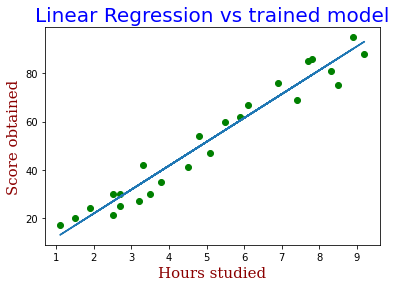

In [16]:
# Plotting the regression line
line = regn.coef_*x+regn.intercept_

# Plotting for the test data
plt.scatter(x, y,c='green')
plt.title('Linear Regression vs trained model',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Score obtained',fontdict=font2)
plt.plot(x, line);
plt.show()

**Predicting Values**

In [17]:
#to predict scores of testing data
y_pred = regn.predict(x_test)

In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual vs predicted values 

In [19]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [20]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


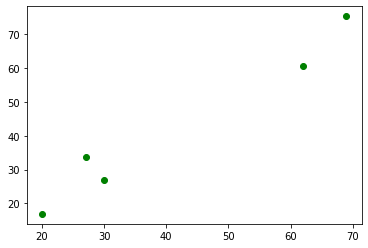

In [21]:
plt.scatter(y_test,y_pred,c='green')
plt.show()



**Solution for given problem statement**

What will be predicted score if a student studies for 9.25 hrs/ day?


In [22]:
hours=9.25
pred_score=regn.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

Number of hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982



**Conclusion**

For a student studying 9.25Hrs a day , the model predicts his score as 93.6917 
